# Basic plot of original data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
ds = xr.open_dataset('./GEOSFP.20160701.A3dyn.4x5.nc').isel(time=0, lev=20)

/Users/zhuangjw/Research/Computing/miniconda3/envs/sci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/zhuangjw/Research/Computing/miniconda3/envs/sci/lib/python3.6/site-packages/matplotlib/transforms.py:759: RuntimeWarning: invalid value encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
/Users/zhuangjw/Research/Computing/miniconda3/envs/sci/lib/python3.6/site-packages/matplotlib/transforms.py:760: RuntimeWarning: invalid value encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
/Users/zhuangjw/Research/Computing/miniconda3/envs/sci/lib/python3.6/site-packages/matplotlib/transforms.py:761: RuntimeWarning: invalid value encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
/Users/zhuangjw/Research/Computing/miniconda3/envs/sci/lib/python3.6/site-packages/matplotlib/transforms.py:762: RuntimeWarning: invalid value encounter

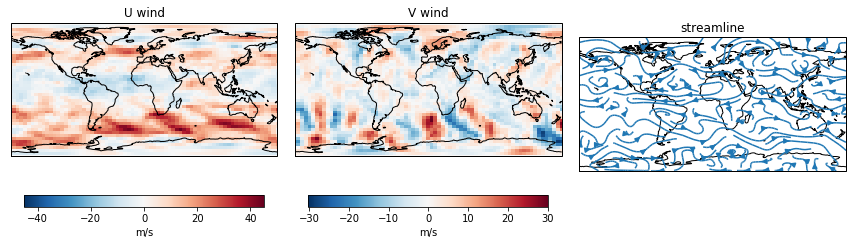

In [3]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4], subplot_kw=dict(projection=ccrs.PlateCarree()))

for ax in axes:
    ax.coastlines()
    
ds['U'].plot(ax = axes[0], cbar_kwargs={'shrink': 0.9, 'label': 'm/s', 'orientation': 'horizontal'})
axes[0].set_title('U wind')

ds['V'].plot(ax = axes[1], cbar_kwargs={'shrink': 0.9, 'label': 'm/s', 'orientation': 'horizontal'})
axes[1].set_title('V wind')

axes[2].streamplot(ds['lon'].values, ds['lat'].values, ds['U'].values, ds['V'].values,
                   density=1)
axes[2].set_title('streamline')

fig.tight_layout()
fig.savefig('wind_plot.png', dpi=200)